# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

2025-01-08 04:40:41.413444: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-08 04:40:41.413572: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-08 04:40:41.567495: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2. Define Dataset Path and Initialize Variables

In [6]:
# Path to the data folder containing train and test folders

data_folder ='/kaggle/input/brain-tumor-dataset/Brain Tumor Dataset'
# Load the images and labels into lists
images = []
labels = []
folders = os.listdir(data_folder)
class_names = os.listdir(os.path.join(data_folder,folders[-1]))
#class_names.remove('.DS_Store')

print(class_names)

['pituitary', 'notumor', 'meningioma', 'glioma']


# 3. Load Images and Labels

In [7]:
for folder in folders:
    folder_path = os.path.join(data_folder, folder)
    for class_index, class_name in enumerate(class_names):
        class_folder_path = os.path.join(folder_path, class_name)
        print(class_folder_path)
        if class_folder_path.find(".DS") != -1:
          continue
        for filename in os.listdir(class_folder_path):
            if filename.endswith('.jpg'):
                img = load_img(os.path.join(class_folder_path, filename), target_size=(224, 224))
                img_arr = img_to_array(img)
                images.append(img_arr)
                labels.append(class_index)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=4)

# Scale the pixel values to a range between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

/kaggle/input/brain-tumor-dataset/Brain Tumor Dataset/Training/pituitary
/kaggle/input/brain-tumor-dataset/Brain Tumor Dataset/Training/notumor
/kaggle/input/brain-tumor-dataset/Brain Tumor Dataset/Training/meningioma
/kaggle/input/brain-tumor-dataset/Brain Tumor Dataset/Training/glioma
/kaggle/input/brain-tumor-dataset/Brain Tumor Dataset/Testing/pituitary
/kaggle/input/brain-tumor-dataset/Brain Tumor Dataset/Testing/notumor
/kaggle/input/brain-tumor-dataset/Brain Tumor Dataset/Testing/meningioma
/kaggle/input/brain-tumor-dataset/Brain Tumor Dataset/Testing/glioma


# 4. Train-Test Split and Preprocessing

In [8]:
X_train.shape[0]+X_test.shape[0]

1130

In [9]:
X_test.shape[0]

226

# 5. Display Sample Images

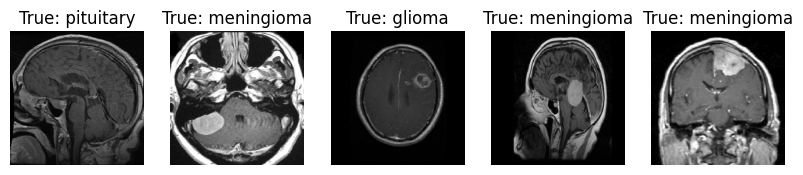

In [10]:
# Display sample images at the beginning
sample_images = X_test[:5]  # Change the number to display more or fewer images
sample_labels = y_test[:5]

plt.figure(figsize=(10, 5))
for i in range(len(sample_images)):
    plt.subplot(1, len(sample_images), i + 1)
    plt.imshow(sample_images[i].reshape(224, 224, 3))
    plt.title(f'True: {class_names[sample_labels[i]]}')
    plt.axis('off')
plt.show()

# 6. Encode Labels

In [11]:
#to encode labels into numerics
def convert(array):
  encoded = []
  for i in array:
    column  =[0] * len(class_names)
    column[i] = 1
    encoded.append(column)
  return np.array(encoded)

y_train = convert(y_train)
y_test = convert(y_test)

In [12]:
X_train.shape, y_train.shape , X_test.shape, y_test.shape

((904, 224, 224, 3), (904, 4), (226, 224, 224, 3), (226, 4))

In [13]:
y_train[1]

array([0, 0, 1, 0])

# 7. Build the MLP Model

In [14]:
# Build the MLP model
model = Sequential()
model.add(Input(shape = X_train.shape[1:],))
model.add(Flatten())
model.add(Dense(92, activation='relu', ))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))  # Use softmax activation for multi-class classification

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 92)             │    13,848,668 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,856,832 (52.86 MB)

 Trainable params: 13,856,832 (52.86 MB)

 Non-trainable params: 0 (0.00 B)

# 8. Compile and Train the Model

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 0.3150 - loss: 4.3623 - val_accuracy: 0.4602 - val_loss: 1.8869
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.5866 - loss: 1.1983 - val_accuracy: 0.5310 - val_loss: 2.0185
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.5658 - loss: 1.4367 - val_accuracy: 0.5973 - val_loss: 1.1485
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.7476 - loss: 0.6460 - val_accuracy: 0.7257 - val_loss: 1.0253
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.8381 - loss: 0.4444 - val_accuracy: 0.7212 - val_loss: 0.9221
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.8071 - loss: 0.4394 - val_accuracy: 0.7345 - val_loss: 0.8494
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.8928 - loss: 0.3319 - val_accuracy: 0.7124 - val_loss: 0.9293
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.8535 - loss: 0.3725 - val_accuracy: 0.

# 9. Plot Training and Validation Metrics

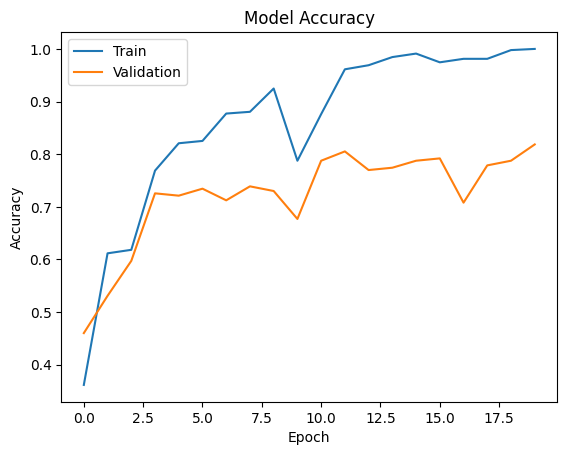

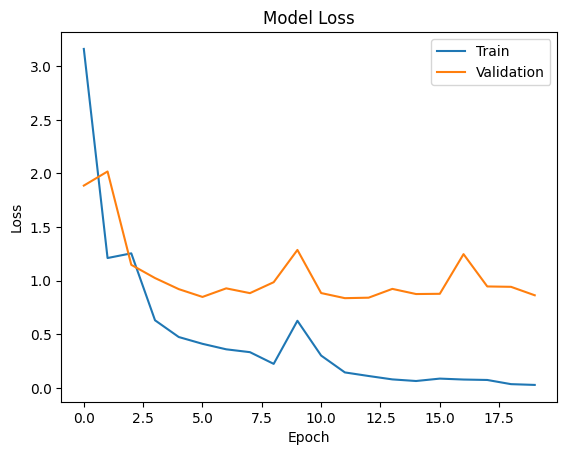

In [16]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

